In [5]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [6]:
%pip install pmdarima

   ---------------------------------------- 0.0/614.7 kB ? eta -:--:--
   ---------------------------------------- 614.7/614.7 kB 4.5 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.8 MB ? eta -:--:--
   -------------------------- ------------- 1.8/2.8 MB 10.1 MB/s eta 0:00:01
   ---------------------------------------- 2.8/2.8 MB 9.5 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [7]:
!pip install statsmodels

## Importing Libraries

In [8]:
import pandas as pd
from pmdarima import auto_arima
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder

## Load your dataset

In [10]:
data = pd.read_csv('Datasets/long_data_.csv')

### Checking Dataset

In [11]:
data.sample(10)

,States,Regions,latitude,longitude,Dates,Usage
1680,Mizoram,NER,23.710399,92.720015,22/02/2019 00:00:00,1.7
12820,Telangana,SR,18.112400,79.019300,13/02/2020 00:00:00,165.9
2577,Delhi,NR,28.669993,77.230004,23/03/2019 00:00:00,63.5
10972,Telangana,SR,18.112400,79.019300,04/12/2019 00:00:00,169.8
1517,Tripura,NER,23.835404,91.279999,17/02/2019 00:00:00,3.7
15082,Haryana,NR,28.450006,77.019991,13/05/2020 00:00:00,106.9
10088,Odisha,ER,19.820430,85.900017,06/11/2019 00:00:00,77.9
4992,Chhattisgarh,WR,22.090420,82.159987,07/06/2019 00:00:00,73.9
3062,Arunachal Pradesh,NER,27.100399,93.616601,07/04/2019 00:00:00,2.2
14878,Manipur,NER,24.799971,93.950017,29/04/2020 00:00:00,2.7


## Checking Missing Values

In [12]:
data.isnull().sum()

States       0
Regions      0
latitude     0
longitude    0
Dates        0
Usage        0
dtype: int64

#### Convert 'Dates' column to datetime

In [13]:
data['Dates'] = pd.to_datetime(data['Dates'], format='%d/%m/%Y %H:%M:%S', dayfirst=True)

Set the 'Dates' column as the index

In [14]:
data.set_index('Dates', inplace=True)

## Checking For Outlier

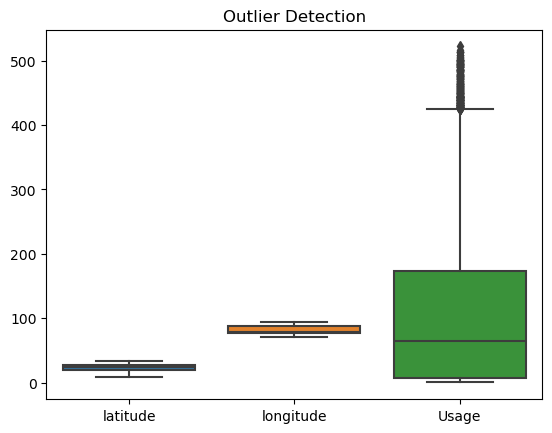

In [15]:
sns.boxplot(data)
plt.title('Outlier Detection')
plt.show()

In [16]:
Q1 = data['Usage'].quantile(0.25)
Q3 = data['Usage'].quantile(0.75)

IQR = Q3 - Q1

lowerbound = Q1 - (1.5 * IQR)
upperbound = Q3 + (1.5 * IQR)

data = data[(data.Usage >= lowerbound) & (data.Usage <= upperbound)]

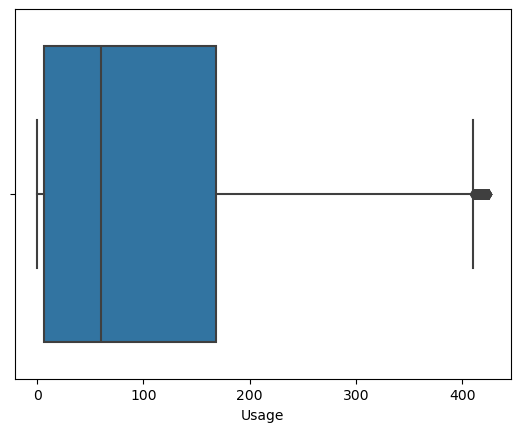

In [17]:
sns.boxplot(x='Usage',data=data)
plt.show()

## Checking Data Distribution

In [18]:
# latitude	longitude	Dates Usage

C:\Users\saich\AppData\Local\Temp\ipykernel_21084\2011712175.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['latitude'], kde=True)
c:\Users\saich\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


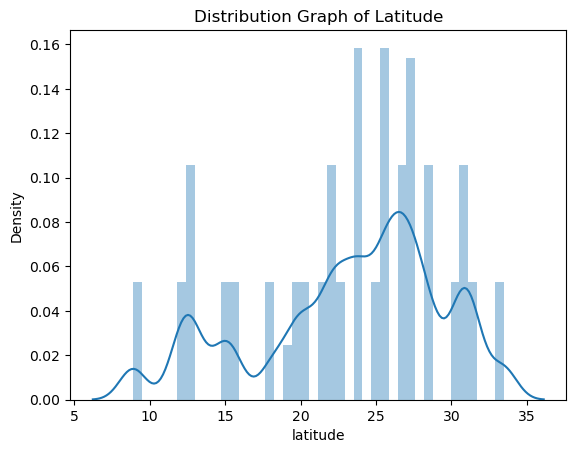

In [19]:
sns.distplot(data['latitude'], kde=True)
plt.title('Distribution Graph of Latitude')
plt.show()

In [20]:
data['latitude'].skew()

-0.585302472467154

In [21]:
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer(method='yeo-johnson')
data['latitude'] = pt.fit_transform(data[['latitude']])

In [22]:
data['latitude'].skew()

-0.1776834059632093

C:\Users\saich\AppData\Local\Temp\ipykernel_21084\2011712175.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['latitude'], kde=True)
c:\Users\saich\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


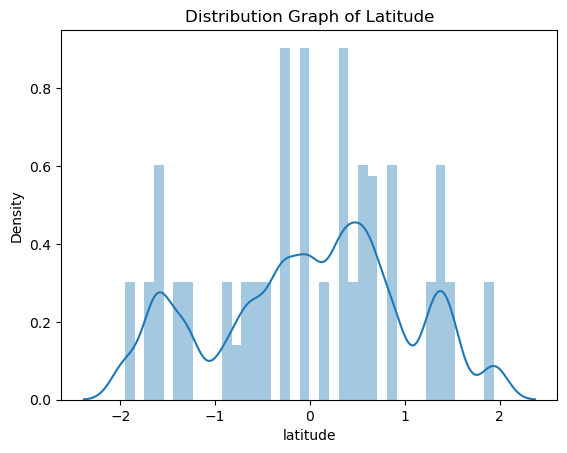

In [23]:
sns.distplot(data['latitude'], kde=True)
plt.title('Distribution Graph of Latitude')
plt.show()

C:\Users\saich\AppData\Local\Temp\ipykernel_21084\660076816.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['longitude'], kde=True)
c:\Users\saich\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


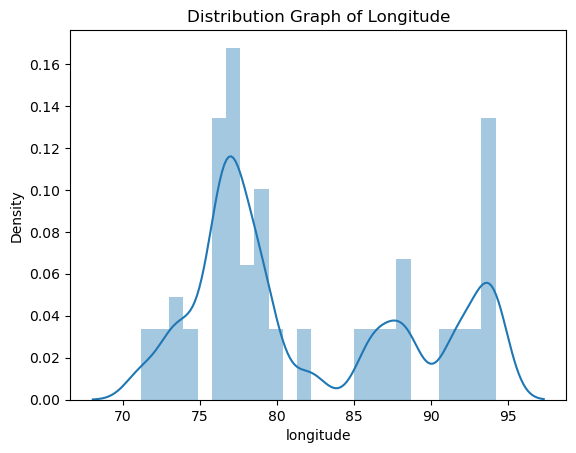

In [24]:
sns.distplot(data['longitude'], kde=True)
plt.title('Distribution Graph of Longitude')
plt.show()

In [25]:
data['longitude'].skew()

0.499118979252289

In [26]:
from scipy.stats import boxcox
data['longitude'], lambda_boxcox = boxcox(data['longitude'])

In [27]:
data['longitude'].skew()

0.0

C:\Users\saich\AppData\Local\Temp\ipykernel_21084\660076816.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['longitude'], kde=True)
c:\Users\saich\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


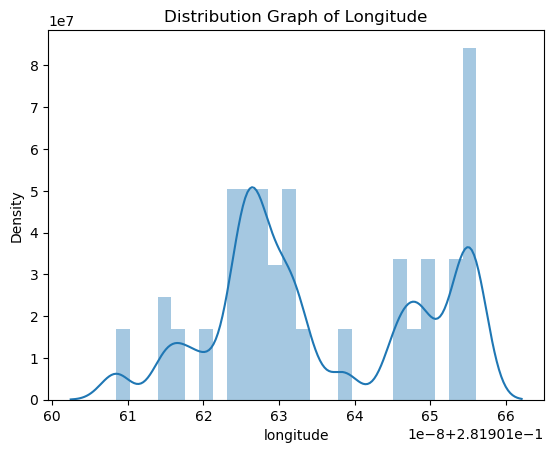

In [28]:
sns.distplot(data['longitude'], kde=True)
plt.title('Distribution Graph of Longitude')
plt.show()

C:\Users\saich\AppData\Local\Temp\ipykernel_21084\2250075933.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Usage'], kde=True)
c:\Users\saich\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


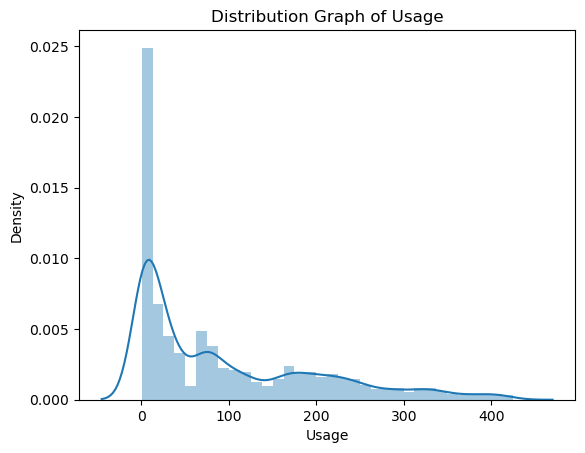

In [29]:
sns.distplot(data['Usage'], kde=True)
plt.title('Distribution Graph of Usage')
plt.show()

In [30]:
data['Usage'].skew()

1.1119828421463722

In [31]:
data['Usage'], lambda_boxcox = boxcox(data['Usage'])

In [32]:
data['Usage'].skew()

-0.14037877619378586

C:\Users\saich\AppData\Local\Temp\ipykernel_21084\2250075933.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Usage'], kde=True)
c:\Users\saich\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


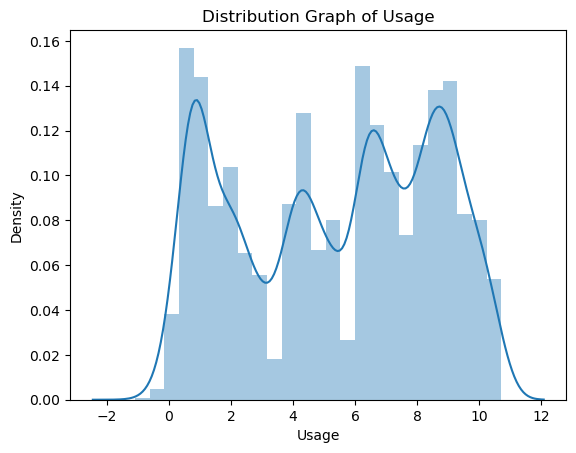

In [33]:
sns.distplot(data['Usage'], kde=True)
plt.title('Distribution Graph of Usage')
plt.show()

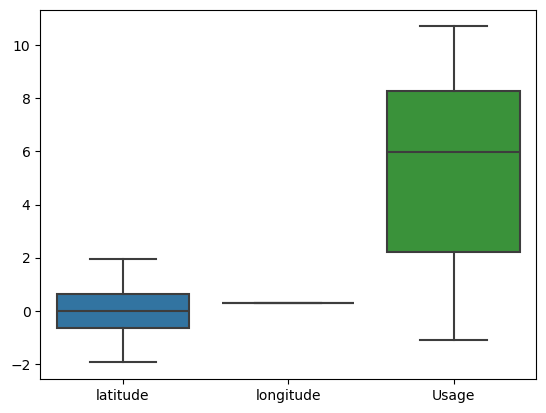

In [34]:
sns.boxplot(data)
plt.show()

## Encoding of Categorial Variables

Using OneHotEncoding

In [35]:
encoder = OneHotEncoder(sparse=False, drop='first')

In [36]:
encoded_categories = encoder.fit_transform(data[['States','Regions']])

c:\Users\saich\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Create a DataFrame with the encoded categories

In [37]:
encoded_df = pd.DataFrame(encoded_categories, columns=encoder.get_feature_names_out(['States', 'Regions']), index=data.index)

Concatenate the encoded categories with the original DataFrame (excluding the original categorical column)


In [38]:
data = pd.concat([data.drop(columns=['States', 'Regions']), encoded_df], axis=1)

In [39]:
data.head()

,latitude,longitude,Usage,States_Arunachal Pradesh,States_Assam,States_Bihar,States_Chandigarh,States_Chhattisgarh,States_DNH,States_Delhi,...,States_Tamil Nadu,States_Telangana,States_Tripura,States_UP,States_Uttarakhand,States_West Bengal,Regions_NER,Regions_NR,Regions_SR,Regions_WR
Dates,,,,,,,,,,,,,,,,,,,,,
2019-01-02,1.508175,0.281902,7.463800,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2019-01-02,0.862767,0.281902,7.656179,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2019-01-02,0.470706,0.281902,9.092914,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2019-01-02,0.907267,0.281902,6.717331,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2019-01-02,0.693377,0.281902,9.869002,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


## Standardization of Data

In [40]:
x = data.drop(['Usage'],axis=1)
y = data['Usage'] 

In [41]:
from sklearn.preprocessing import StandardScaler

In [42]:
Scaler = StandardScaler()

In [43]:
x_scaled = Scaler.fit_transform(x) 

In [44]:
x_scaled.shape

(16285, 38)

In [45]:
y.shape

(16285,)

## Data Splitting

In [46]:
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size=0.2,random_state=42)

#### AdFuller Report

In [47]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(y_train)
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')

ADF Statistic: -113.62567481473036
p-value: 0.0


## ARIMA

In [48]:
import pmdarima as pm
auto_model = pm.auto_arima(y_train, seasonal=False, trace=True,
                            error_action='ignore', suppress_warnings=True)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=inf, Time=4.86 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=84555.456, Time=0.14 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=74144.046, Time=0.19 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=79393.149, Time=0.65 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=71587.218, Time=0.39 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=70330.268, Time=0.48 sec
 ARIMA(4,0,0)(0,0,0)[0]             : AIC=69609.522, Time=0.66 sec
 ARIMA(5,0,0)(0,0,0)[0]             : AIC=69176.037, Time=0.80 sec
 ARIMA(5,0,1)(0,0,0)[0]             : AIC=inf, Time=10.80 sec
 ARIMA(4,0,1)(0,0,0)[0]             : AIC=inf, Time=11.29 sec
 ARIMA(5,0,0)(0,0,0)[0] intercept   : AIC=66977.446, Time=2.42 sec
 ARIMA(4,0,0)(0,0,0)[0] intercept   : AIC=66975.504, Time=1.80 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=66974.089, Time=1.50 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=66972.813, Time=0.98 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept  

In [49]:
auto_model.fit(y_train)

ARIMA(order=(0, 0, 0), scoring_args={}, suppress_warnings=True)

In [50]:
arima_pred = auto_model.predict(n_periods=len(y_test))

c:\Users\saich\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\saich\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [51]:
print(auto_model.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                13028
Model:                        SARIMAX   Log Likelihood              -33482.553
Date:                Tue, 18 Mar 2025   AIC                          66969.107
Time:                        20:40:38   BIC                          66984.057
Sample:                             0   HQIC                         66974.101
                              - 13028                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      5.3446      0.028    190.272      0.000       5.290       5.400
sigma2         9.9963      0.213     46.877      0.000       9.578      10.414
Ljung-Box (L1) (Q):                   0.25   Jarque-

In [52]:
mse = mean_squared_error(y_test, arima_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 10.087306182631005


## SARIMAX

In [53]:
auto_model = pm.auto_arima(y_train,seasonal=True, m=12,trace=True, error_action='ignore',suppress_warnings=True)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,0,1)[12] intercept   : AIC=inf, Time=48.80 sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=66969.107, Time=0.24 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : AIC=66972.848, Time=9.00 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : AIC=66972.847, Time=3.72 sec
 ARIMA(0,0,0)(0,0,0)[12]             : AIC=84555.456, Time=0.13 sec
 ARIMA(0,0,0)(1,0,0)[12] intercept   : AIC=66971.097, Time=5.02 sec
 ARIMA(0,0,0)(0,0,1)[12] intercept   : AIC=66971.097, Time=2.98 sec
 ARIMA(0,0,0)(1,0,1)[12] intercept   : AIC=inf, Time=28.70 sec
 ARIMA(1,0,0)(0,0,0)[12] intercept   : AIC=66970.861, Time=0.53 sec
 ARIMA(0,0,1)(0,0,0)[12] intercept   : AIC=66970.860, Time=1.00 sec
 ARIMA(1,0,1)(0,0,0)[12] intercept   : AIC=66972.862, Time=1.48 sec

Best model:  ARIMA(0,0,0)(0,0,0)[12] intercept
Total fit time: 101.713 seconds


In [54]:
auto_model.fit(y_train)

ARIMA(order=(0, 0, 0), scoring_args={}, seasonal_order=(0, 0, 0, 12),
      suppress_warnings=True)

In [55]:
sarimax_pred = auto_model.predict(n_periods=len(y_test))

c:\Users\saich\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\saich\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [56]:
print(auto_model.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                13028
Model:                        SARIMAX   Log Likelihood              -33482.553
Date:                Tue, 18 Mar 2025   AIC                          66969.107
Time:                        20:42:21   BIC                          66984.057
Sample:                             0   HQIC                         66974.101
                              - 13028                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      5.3446      0.028    190.272      0.000       5.290       5.400
sigma2         9.9963      0.213     46.877      0.000       9.578      10.414
Ljung-Box (L1) (Q):                   0.25   Jarque-

In [57]:
mse = mean_squared_error(y_test, sarimax_pred)
print(f'Mean Squared Error (SARIMAX): {mse}')

Mean Squared Error (SARIMAX): 10.087306182631005
